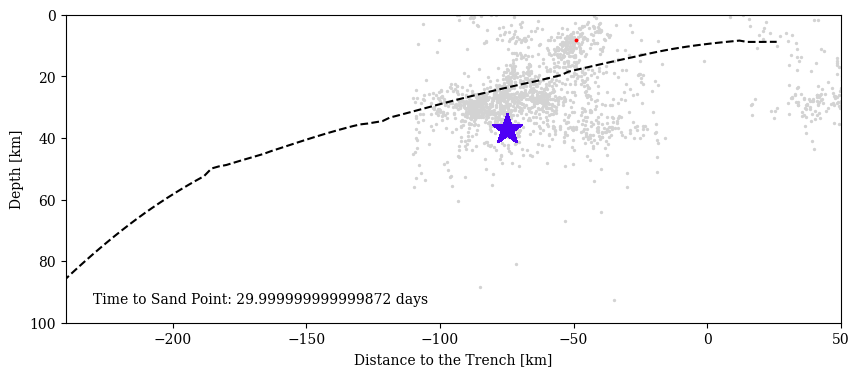

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from obspy.imaging.beachball import beach

# Load earthquake catalog
data = pd.read_csv("BB")
slab = np.loadtxt('slab.grd')
start, end = -5, 30
# Set up the map
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim([-240, 50])
ax.set_ylim([0, 100])
ax.invert_yaxis()
ax.set_xlabel("Distance to the Trench [km]")
ax.set_ylabel("Depth [km]")

plt.plot(slab[:, 0], slab[:, 3], c = 'black', linestyle = '--')

scat_background = ax.scatter([], [], s = 2, c = 'lightgray')
scat = ax.scatter([], [], s = 3, c = 'red')
text = ax.text(-230, 90, '', horizontalalignment='left', verticalalignment='top')

# b = beach(moment_list, xy=(-74.96828566861143, 37), width=20, linewidth=1, alpha=0.85)



previous_frame = start
def update(frame):
    global previous_frame  

    background = data[data['time2sandpoint'] < previous_frame]
    current_data = data[(data['time2sandpoint'] > previous_frame) & (data['time2sandpoint'] <= frame)]
    text.set_text(f'Time to Sand Point: {frame} days')

    scat_background.set_offsets(background[['dist', 'depth_km']].values)
    scat.set_offsets(current_data[['dist', 'depth_km']].values)

    if frame >= 0:
        # ax.add_collection(b)
        ax.scatter(-74.96828566861143, 37, s = 500, c = '#4E00F5', marker = '*')
    
    previous_frame = frame

    return (scat_background, scat)

frames = np.arange(start, end + 0.1, 0.1)  # Adjust as per your data
ani = FuncAnimation(fig, update, frames=frames)
ani.save("earthquake.mp4", fps=50)

plt.show()

In [29]:
from math import radians, sin, cos, asin, sqrt

def distance_to_sandpoint(lon, lat, dep):
    '''
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    '''
    
    lon1, lat1, lon2, lat2 = map(radians, [lon, lat, -159.7, 54.48])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    h_dist = c * r
    return sqrt(h_dist ** 2 + (dep - 37) ** 2)

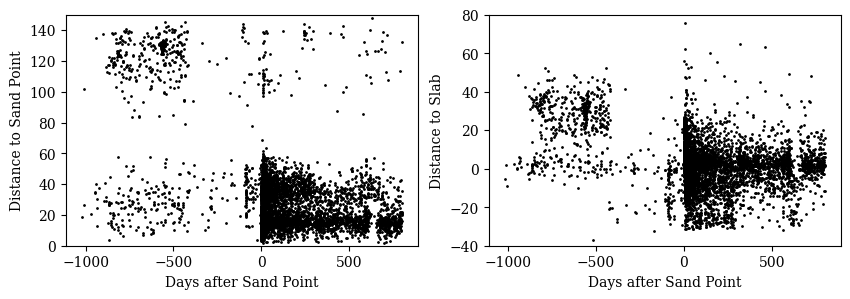

In [48]:
data = pd.read_csv('/mnt/ufs18/nodr/home/jieyaqi/alaska/AlaskaEQ/iter2/catalogs_bootstrap_processed_associated_new.csv')
data = data[~data['time2sandpoint'].isna()]
data['dist_sandpoint'] = data.apply(lambda x: distance_to_sandpoint(x["longitude"], x["latitude"], x["depth_km"]), axis = 1)

plt.figure(figsize = (10, 3))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10
plt.subplot(1, 2, 1)
plt.scatter(data['time2sandpoint'], data['dist_sandpoint'], s = 1, c = 'black')
plt.xlabel('Days after Sand Point')
plt.ylabel('Distance to Sand Point')
plt.ylim([0, 150])
plt.subplot(1, 2, 2)
plt.scatter(data['time2sandpoint'], data['slab_normal_depth_km'], s = 1, c = 'black')
plt.xlabel('Days after Sand Point')
plt.ylabel('Distance to Slab')
plt.ylim(-40, 80)
plt.savefig('Sandpoint.pdf', format = 'pdf', bbox_inches='tight')

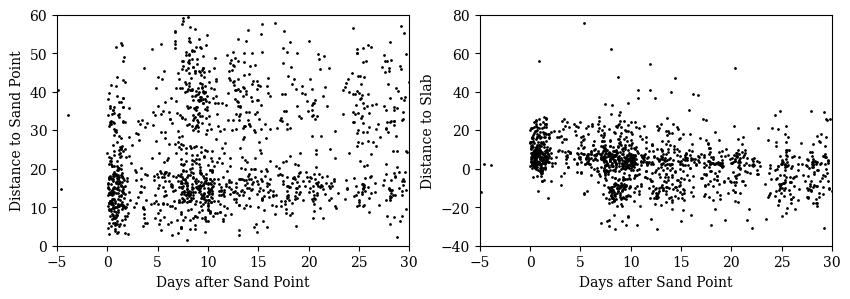

In [49]:
data = pd.read_csv('/mnt/ufs18/nodr/home/jieyaqi/alaska/AlaskaEQ/iter2/catalogs_bootstrap_processed_associated_new.csv')
data = data[~data['time2sandpoint'].isna()]
data['dist_sandpoint'] = data.apply(lambda x: distance_to_sandpoint(x["longitude"], x["latitude"], x["depth_km"]), axis = 1)

plt.figure(figsize = (10, 3))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10
plt.subplot(1, 2, 1)
plt.scatter(data['time2sandpoint'], data['dist_sandpoint'], s = 1, c = 'black')
plt.xlabel('Days after Sand Point')
plt.ylabel('Distance to Sand Point')
plt.xlim([-5, 30])
plt.ylim([0, 60])
plt.subplot(1, 2, 2)
plt.scatter(data['time2sandpoint'], data['slab_normal_depth_km'], s = 1, c = 'black')
plt.xlabel('Days after Sand Point')
plt.ylabel('Distance to Slab')
plt.ylim(-40, 80)
plt.xlim([-5, 30])
plt.savefig('Sandpoint_zoomin.pdf', format = 'pdf', bbox_inches='tight')